In [109]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
x_data = np.linspace(0, 10, 10)+np.random.uniform(-1.5, 1.5, 10)
#генерируем 10 значений от 0 до 10 и добавляем к каждому шум (случайное значение от -1.5 до 1.5)
x_data

array([-0.40216461,  2.44438747,  1.90996792,  2.92502768,  3.84721147,
        4.87670226,  5.35438582,  8.31248933,  9.72924119, 10.55671793])

In [82]:
y_data = np.linspace(0, 10, 10)+np.random.uniform(-1.5, 1.5, 10)
y_data

array([-1.22706864,  0.32367958,  2.30719208,  4.13834306,  3.03601734,
        4.72466177,  7.38430034,  8.43760935,  7.93547088,  9.00187412])

In [83]:
%matplotlib inline

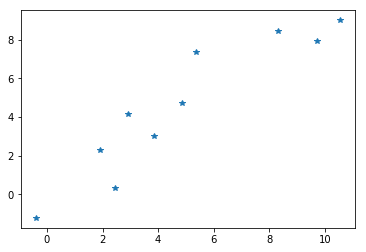

In [84]:
plt.plot(x_data, y_data, '*')

In [85]:
np.random.rand(2)

array([0.70380704, 0.46287764])

In [86]:
k = tf.Variable(0.37)
b = tf.Variable(0.76)

In [87]:
error = 0

In [88]:
for x,y in zip(x_data, y_data):
    y_hat = k*x + b
    error += (y-y_hat)**2

In [89]:
error

<tf.Tensor 'add_109:0' shape=() dtype=float32>

In [90]:
optimizer = tf.train.GradientDescentOptimizer(0.001) #0.001 - learning rate

In [91]:
train = optimizer.minimize(error)

In [92]:
init = tf.global_variables_initializer()

In [93]:
sess = tf.Session()

In [94]:
sess.run(init)

In [95]:
epoch = 100
for i in range(epoch):
    sess.run(train)

In [96]:
k_final, b_final = sess.run([k,b])

In [97]:
k_final, b_final

(0.8636792, 0.45685557)

In [98]:
x_test = np.linspace(-1, 11, 10)
y_predict = k_final * x_test + b_final

In [99]:
y_predict


array([-0.40682361,  0.74474862,  1.89632085,  3.04789308,  4.1994653 ,
        5.35103753,  6.50260976,  7.65418199,  8.80575421,  9.95732644])

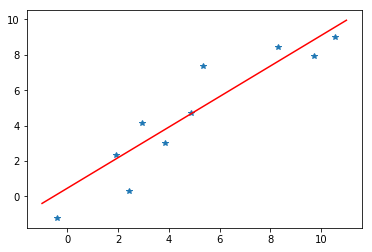

In [100]:
plt.plot(x_data, y_data, '*')
plt.plot(x_test, y_predict, 'r')

### Возьмем новые данные

In [107]:
x_data = np.linspace(0, 10, 1000000)
noise = np.random.rand(1000000)
x_data[:20]

array([0.0000000e+00, 1.0000010e-05, 2.0000020e-05, 3.0000030e-05,
       4.0000040e-05, 5.0000050e-05, 6.0000060e-05, 7.0000070e-05,
       8.0000080e-05, 9.0000090e-05, 1.0000010e-04, 1.1000011e-04,
       1.2000012e-04, 1.3000013e-04, 1.4000014e-04, 1.5000015e-04,
       1.6000016e-04, 1.7000017e-04, 1.8000018e-04, 1.9000019e-04])

In [108]:
y_true = (0.5*x_data) + 5 + noise

In [111]:
my_data = pd.DataFrame({'X data':x_data, 'Y':y_true})

In [112]:
my_data.head()

,X data,Y
0,0.00000,5.829731
1,0.00001,5.385529
2,0.00002,5.855744
3,0.00003,5.826541
4,0.00004,5.855149


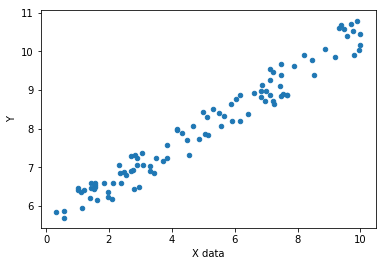

In [123]:
my_data.sample(100).plot(x='X data', y='Y', kind='scatter')

In [125]:
k = tf.Variable(0.5)
b = tf.Variable(1.0)

In [142]:
#эпоха для таких больших данных не влезет в память, поэтому берем пачками
batch_size = 10000

In [143]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [144]:
y_hat = tf.add(tf.multiply(k, xph), b)

In [145]:
error = tf.reduce_sum(tf.square(yph-y_hat))

In [146]:
optimizer = tf.train.GradientDescentOptimizer(0.001)

In [147]:
train = optimizer.minimize(error)

In [148]:
init = tf.global_variables_initializer()

In [149]:
sess = tf.Session()

In [150]:
sess.run(init)

In [157]:
for i in range(1000000//batch_size):
    rand_ind = np.random.randint(len(x_data), size=batch_size)
    feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    sess.run(train, feed)

In [159]:
k_final, b_final = sess.run([k,b])
k_final, b_final

(nan, nan)

In [162]:
x_test = np.linspace(-1, 11, 1000000//batch_size)
y_predict = k_final*x_test + b_final

ValueError: x and y must have same first dimension, but have shapes (1000000,) and (10,)

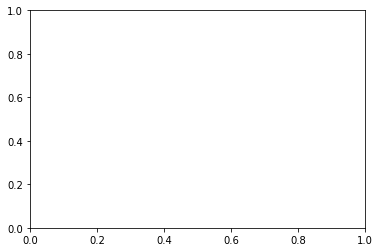

In [163]:
plt.plot(x_data, y_data, '*')
plt.plot(x_test, y_predict, 'r')

#### Tensorflow Estimaotr

In [164]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [167]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols, 
                                         model_dir = 'C:\\Users\\aaleshin\\Mine\\Studies\\model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aaleshin\\Mine\\Studies\\model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022ADB054668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [170]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_data[:900000]}, 
                                                y_true[:900000], batch_size=1000, num_epochs=1, shuffle=False)

In [171]:
estimator.train(input_fn=input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\aaleshin\Mine\Studies\model\model.ckpt.
INFO:tensorflow:loss = 30171.77, step = 1
INFO:tensorflow:global_step/sec: 157.98
INFO:tensorflow:loss = 281.3111, step = 101 (0.635 sec)
INFO:tensorflow:global_step/sec: 133.511
INFO:tensorflow:loss = 142.31174, step = 201 (0.750 sec)
INFO:tensorflow:global_step/sec: 103.307
INFO:tensorflow:loss = 85.92056, step = 301 (1.001 sec)
INFO:tensorflow:global_step/sec: 108.933
INFO:tensorflow:loss = 83.93834, step = 401 (0.889 sec)
INFO:tensorflow:global_step/sec: 156.008
INFO:tensorflow:loss = 87.54401, step = 501 (0.637 sec)
INFO:tensorflow:global_step/sec: 201.613
INFO:tensorflow:loss = 81.46425, step = 601 (0.496 sec)
INFO:tensorflow:global_step/sec: 202.43
INFO

Дальше:  

* estimator.predict(...)  
* estimator.evaluate(..)

## Д/З

Regression Exercise - решить задачу